In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import tree




In [2]:

# Baca data langsung dari URL
url = 'https://raw.githubusercontent.com/sergiohalim/data_mining-/refs/heads/main/adult.csv'
df = pd.read_csv(url)

# Lihat beberapa baris pertama dari dataset
df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


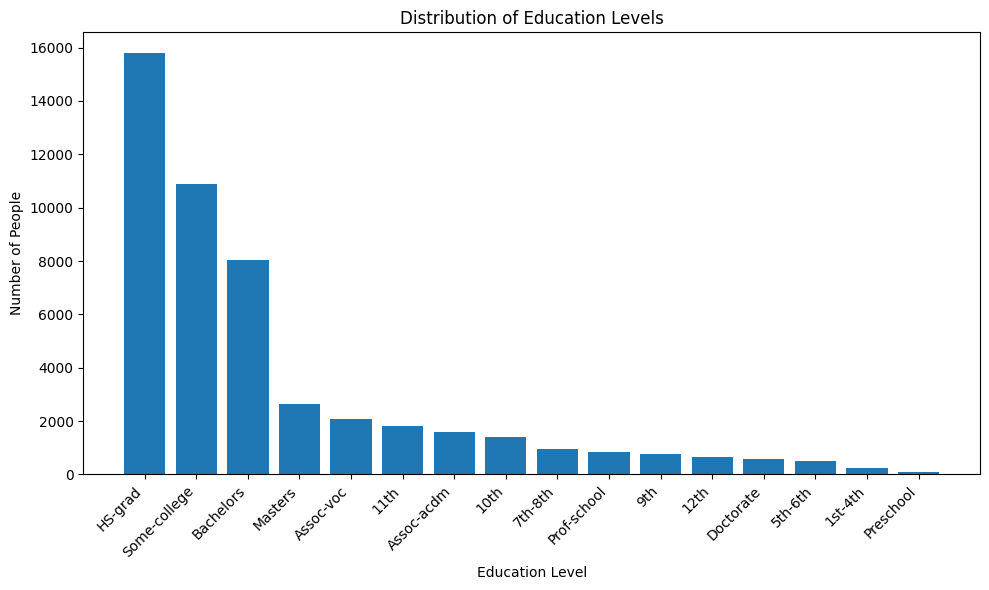

In [8]:

# create a bar plot for the 'education' column
education_counts = df['education'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(education_counts.index, education_counts.values)
plt.xlabel('Education Level')
plt.ylabel('Number of People')
plt.title('Distribution of Education Levels')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

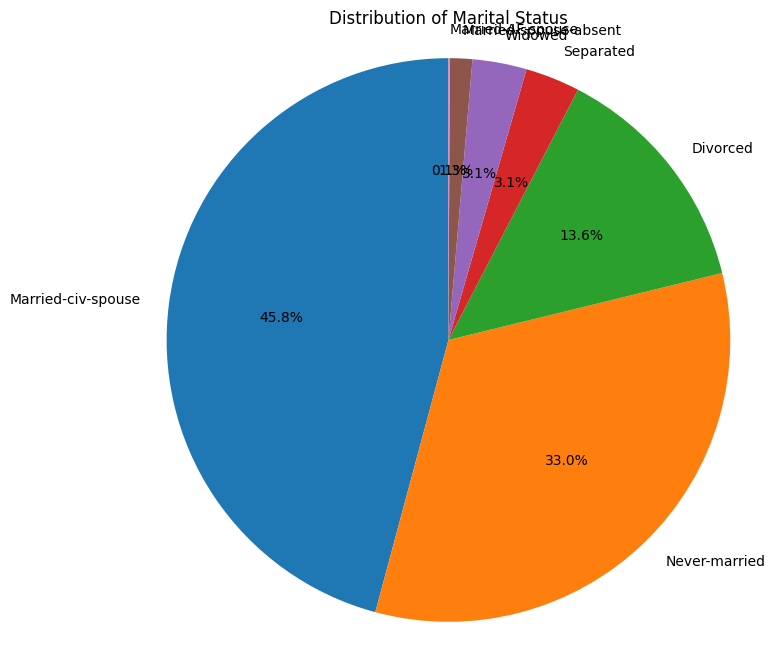

In [9]:
# prompt: buatlah pie cahrt nya

# Assuming you want a pie chart for the 'marital-status' column
marital_status_counts = df['marital-status'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Marital Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

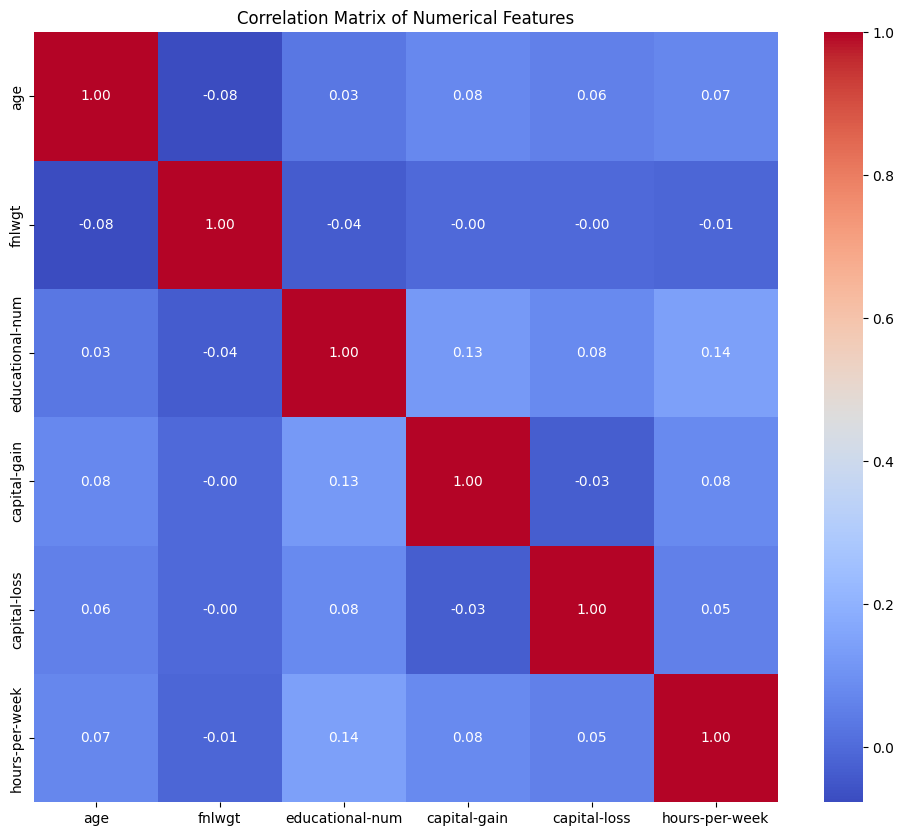

In [12]:

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


SPLITING X & **Y**

In [26]:


# Assuming 'income' is your target variable
X = df.drop('income', axis=1)
y = df['income']

# Print the shape of X and y to verify the split
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)



Shape of X: (48842, 14)
Shape of y: (48842,)


DESICION ***TREE***

In [33]:
#Criterion Entropy
#a
clf_entro = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0)
clf_entro.fit(x_train, y_train)



DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [34]:

#b
y_pred_entro = clf_entro.predict(x_test)

#using the split data that i already done before

In [35]:

print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_entro)))

Model accuracy score with criterion entropy: 0.8515


In [36]:

print('Training set score: {0:0.4f}' .format(clf_entro.score(x_train, y_train)))
print('Test set score: {0:0.4f}' .format(clf_entro.score(x_test, y_test)))

Training set score: 0.8423
Test set score: 0.8515


[Text(0.5, 0.875, 'x[30] <= 0.5\nentropy = 0.796\nsamples = 39073\nvalue = [29676, 9397]'),
 Text(0.25, 0.625, 'x[3] <= 7055.5\nentropy = 0.346\nsamples = 21099\nvalue = [19731, 1368]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[2] <= 12.5\nentropy = 0.283\nsamples = 20738\nvalue = [19718, 1020]'),
 Text(0.0625, 0.125, 'entropy = 0.161\nsamples = 16630\nvalue = [16238, 392]'),
 Text(0.1875, 0.125, 'entropy = 0.617\nsamples = 4108\nvalue = [3480, 628]'),
 Text(0.375, 0.375, 'x[3] <= 8296.0\nentropy = 0.224\nsamples = 361\nvalue = [13.0, 348.0]'),
 Text(0.3125, 0.125, 'entropy = 0.932\nsamples = 23\nvalue = [8, 15]'),
 Text(0.4375, 0.125, 'entropy = 0.111\nsamples = 338\nvalue = [5, 333]'),
 Text(0.75, 0.625, 'x[3] <= 5095.5\nentropy = 0.992\nsamples = 17974\nvalue = [9945, 8029]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[2] <= 12.5\nentropy = 0.971\nsamples = 16559\nvalue = [9933, 6626]'),
 Text(0.5625, 0.125, 'entropy = 0.881\nsamples = 12027\nvalue = [8421, 36

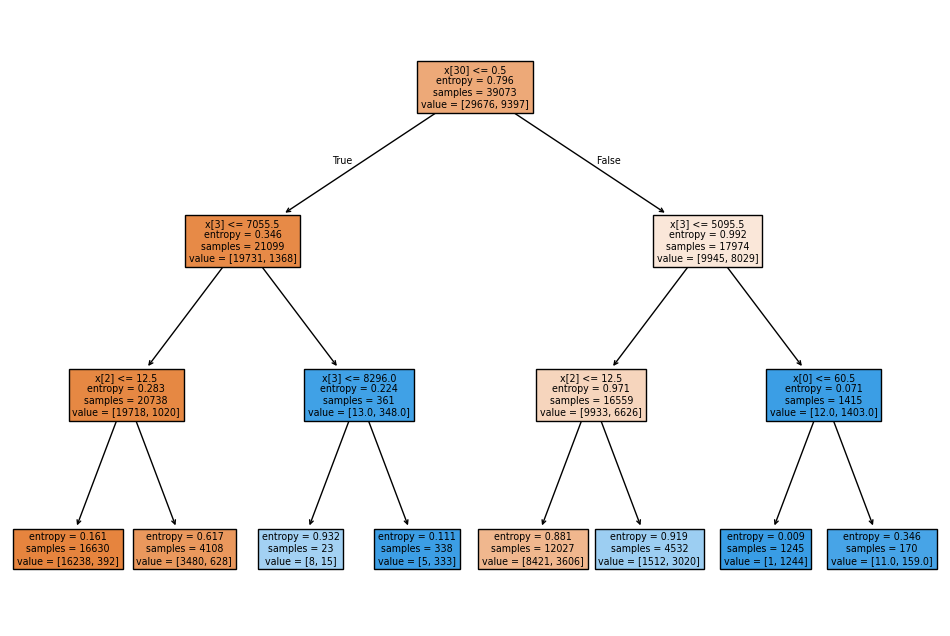

In [37]:

plt.figure(figsize = (12,8))
tree.plot_tree(clf_entro.fit(x_train, y_train), filled = True)

Criterian Gini Index

In [38]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state = 0)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [39]:

y_pred_gini = clf_gini.predict(x_test)

In [40]:

print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8515


In [41]:

#d
print('Training set score: {0:0.4f}' .format(clf_gini.score(x_train, y_train)))
print('Test set score: {0:0.4f}' .format(clf_gini.score(x_test, y_test)))

Training set score: 0.8424
Test set score: 0.8515


[Text(0.5, 0.875, 'x[30] <= 0.5\ngini = 0.365\nsamples = 39073\nvalue = [29676, 9397]'),
 Text(0.25, 0.625, 'x[3] <= 7055.5\ngini = 0.121\nsamples = 21099\nvalue = [19731, 1368]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[2] <= 12.5\ngini = 0.094\nsamples = 20738\nvalue = [19718, 1020]'),
 Text(0.0625, 0.125, 'gini = 0.046\nsamples = 16630\nvalue = [16238, 392]'),
 Text(0.1875, 0.125, 'gini = 0.259\nsamples = 4108\nvalue = [3480, 628]'),
 Text(0.375, 0.375, 'x[0] <= 20.5\ngini = 0.069\nsamples = 361\nvalue = [13.0, 348.0]'),
 Text(0.3125, 0.125, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.4375, 0.125, 'gini = 0.044\nsamples = 355\nvalue = [8, 347]'),
 Text(0.75, 0.625, 'x[2] <= 12.5\ngini = 0.494\nsamples = 17974\nvalue = [9945, 8029]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[3] <= 5095.5\ngini = 0.444\nsamples = 12630\nvalue = [8431, 4199]'),
 Text(0.5625, 0.125, 'gini = 0.42\nsamples = 12027\nvalue = [8421, 3606]'),
 Text(0.6875, 0.125, 'gini = 0.

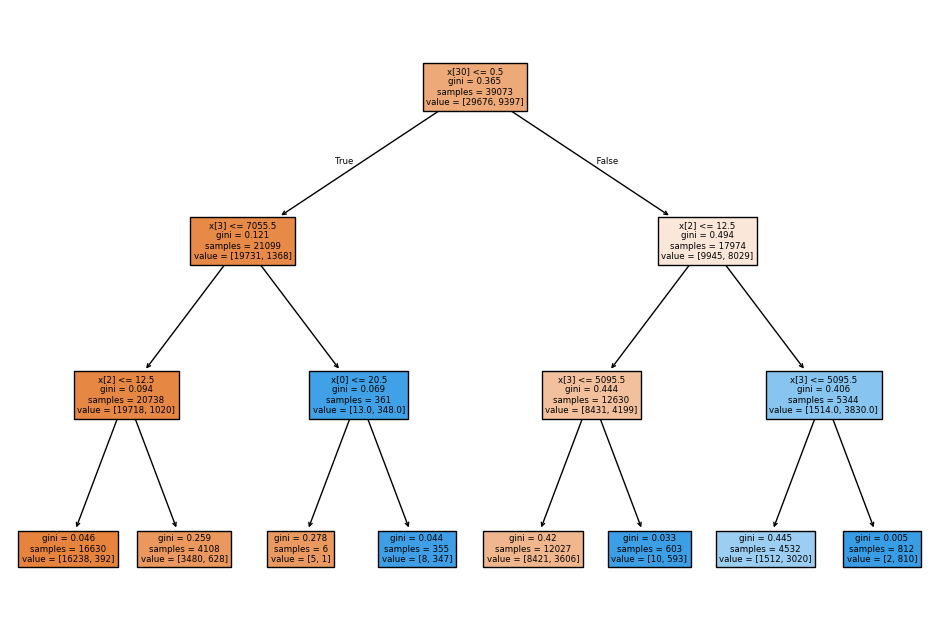

In [42]:
plt.figure(figsize = (12,8))
tree.plot_tree(clf_gini.fit(x_train, y_train), filled = True)